# Imports

In [110]:
import random
import numpy as np
import importlib
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier

import transformations as trans; importlib.reload(trans)
import visualisiations as vis; importlib.reload(vis)
import basic_models; importlib.reload(basic_models)
import metrics as met; importlib.reload(met)

<module 'metrics' from 'c:\\Users\\noams\\Python Projects\\Machine Learning Project\\metrics.py'>

In [3]:
X_train, X_test, y_train, y_test = basic_models.load_preprocess_mnist_data(scale_features=False, flatten_image=False, use_pca=False)

# Transformations Tests

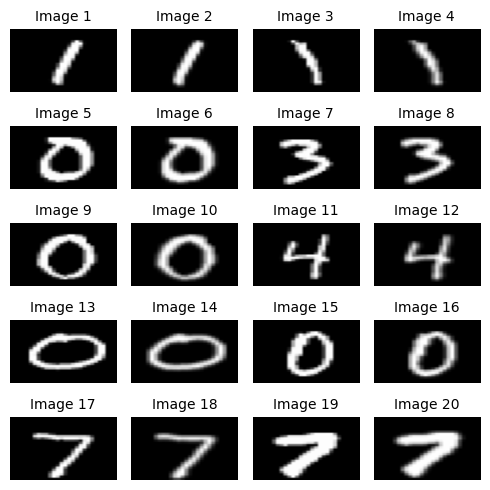

In [4]:
sample_space = X_test[:100]
images = random.sample(list(sample_space), 10)
vis.plot_before_after_transform(images, trans.center_image)

C:\Users\alons\PycharmProjects\machine_lerning\Machine_Learning_Project\visualisiations.py:65: UserWarning: Glyph 8736 (\N{ANGLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Program Files\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8736 (\N{ANGLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


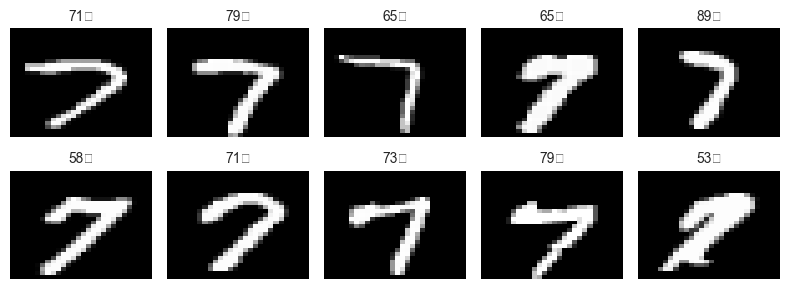

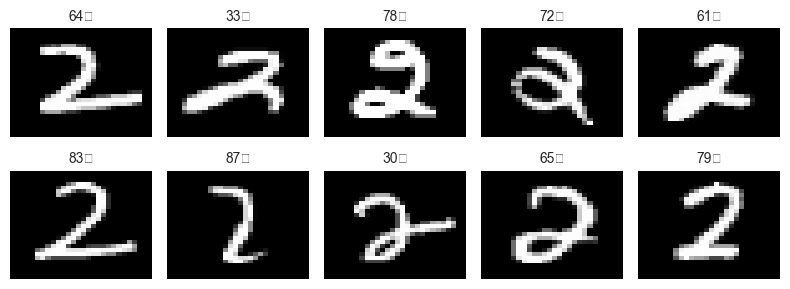

In [5]:
# get the train images of '9'
sample_space = list(X_train[y_train == 7])
images = random.sample(sample_space, 10)
vis.plot_images_with_tilt_angles(images, 5, figsize=(8, 3))

sample_space = list(X_train[y_train == 2])
images = random.sample(sample_space, 10)
vis.plot_images_with_tilt_angles(images, 5, figsize=(8, 3))

##### is the deskewing function functioning? - NO.

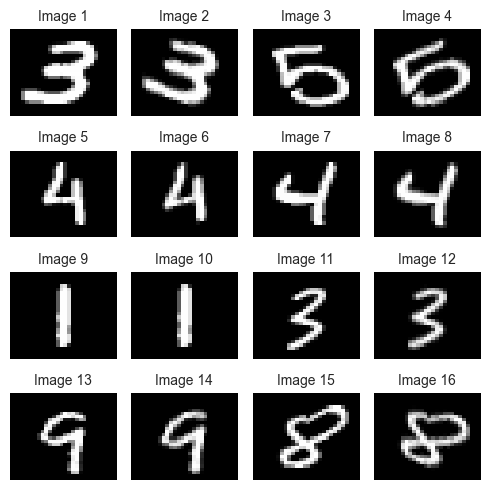

In [6]:
image_list = random.sample(list(X_train), 8)
vis.plot_before_after_transform(image_list, trans.deskew_image)

## Forier transorm

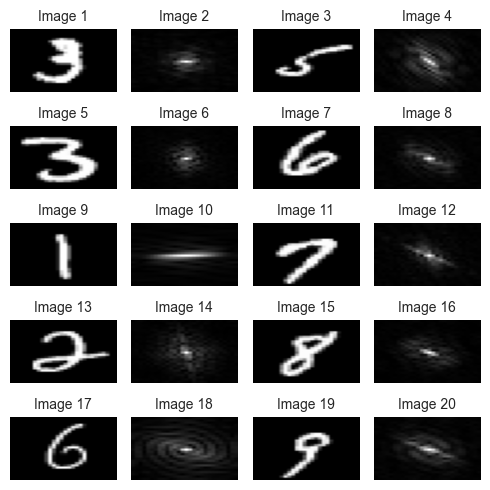

In [ ]:
from transformations import fourier_transform_features
vis.plot_before_after_transform(X_train[10:20],transformation=fourier_transform_features)

## PCA


=== KNN ===
Accuracy: 0.9752


,precision,recall,f1-score,support
0,0.97,0.99,0.98,980.00
1,0.98,1.00,0.99,1135.00
2,0.98,0.98,0.98,1032.00
3,0.97,0.97,0.97,1010.00
4,0.98,0.98,0.98,982.00
5,0.97,0.97,0.97,892.00
6,0.98,0.99,0.98,958.00
7,0.97,0.97,0.97,1028.00
8,0.98,0.95,0.97,974.00
9,0.97,0.96,0.97,1009.00


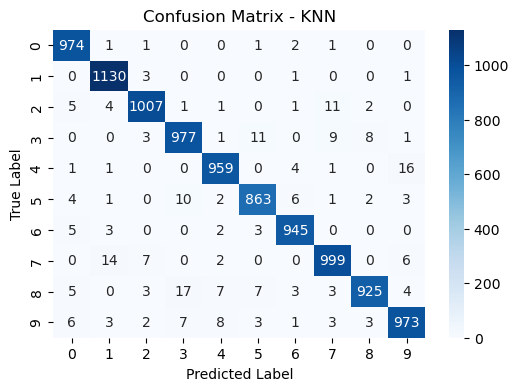

In [27]:
X_train, X_test, y_train, y_test = basic_models.load_preprocess_mnist_data(scale_features=True, flatten_image=True, use_pca=True, pca_variance=0.85)
knn = basic_models.train_knn(X_train, y_train, X_test, y_test, k=3)

## Elastic Deformations

In [2]:
X_train, X_test, y_train, y_test = basic_models.load_preprocess_mnist_data(scale_features=False, flatten_image=False)

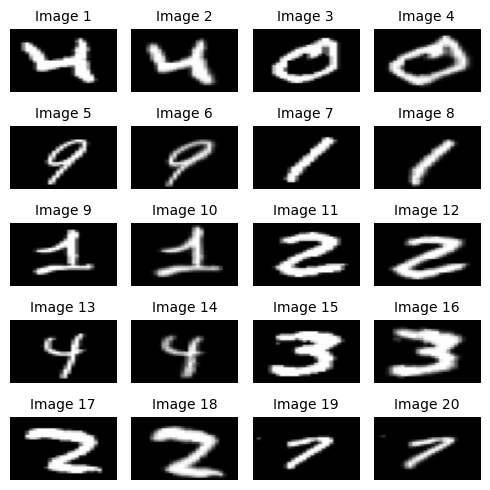

In [42]:
sample_space = list(X_train[20:30])
vis.plot_before_after_transform(sample_space, trans.random_elastic_deformation, random_state=np.random.RandomState(42), sigma=5, alpha=25)

In [63]:
X_train_augmented = [trans.random_elastic_deformation(image, random_state=np.random.RandomState(42), sigma=5, alpha=20) for image in X_train]
X_test_augmented = [trans.random_elastic_deformation(image, random_state=np.random.RandomState(42), sigma=5, alpha=20) for image in X_test]

In [64]:
# function to flatten the image
def flatten_images(images):
    return np.array([image.flatten() for image in images])

print(flatten_images(X_test).shape)

(10000, 784)


In [65]:
# concatenate the original and augmented features
X_train_combined = np.concatenate((flatten_images(X_train), flatten_images(X_train_augmented)))
X_test_combined = np.concatenate((flatten_images(X_test), flatten_images(X_test_augmented)))

# concatenate the original and augmented labels
y_train_combined = np.concatenate((y_train, y_train))
y_test_combined = np.concatenate((y_test, y_test))

print(X_train_combined.shape)
print(X_test_combined.shape)

print(y_train_combined.shape)
print(y_test_combined.shape)

(120000, 784)
(20000, 784)
(120000,)
(20000,)



=== KNN ===
Accuracy: 0.9727


,precision,recall,f1-score,support
0,0.97,0.99,0.98,1960.00
1,0.97,1.00,0.98,2270.00
2,0.98,0.97,0.98,2064.00
3,0.96,0.97,0.97,2020.00
4,0.98,0.97,0.97,1964.00
5,0.96,0.96,0.96,1784.00
6,0.98,0.99,0.98,1916.00
7,0.97,0.97,0.97,2056.00
8,0.98,0.95,0.96,1948.00
9,0.96,0.96,0.96,2018.00


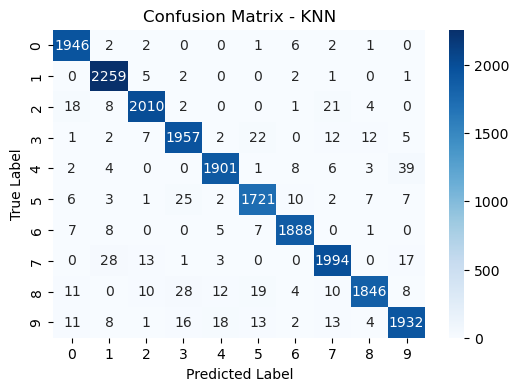

In [66]:
knn = basic_models.train_knn(X_train_combined, y_train_combined, X_test_combined, y_test_combined, k=3)

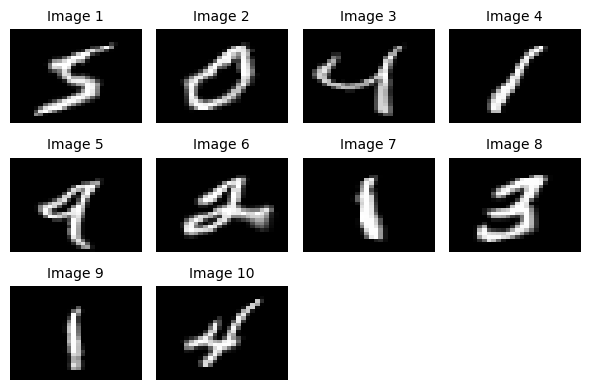

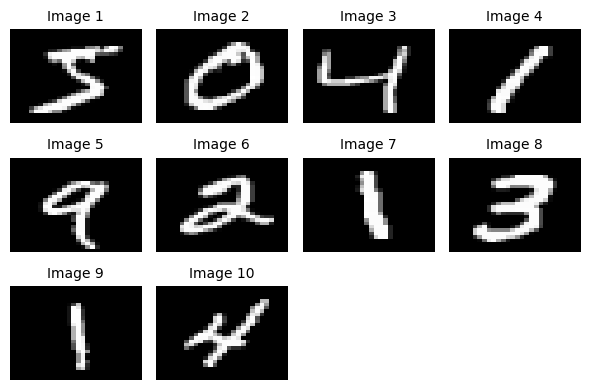

In [29]:
vis.plot_grid(X_train_augmented[:10], 4)
vis.plot_grid(X_train[:10], 4)


# Distance Metrics

## EMD

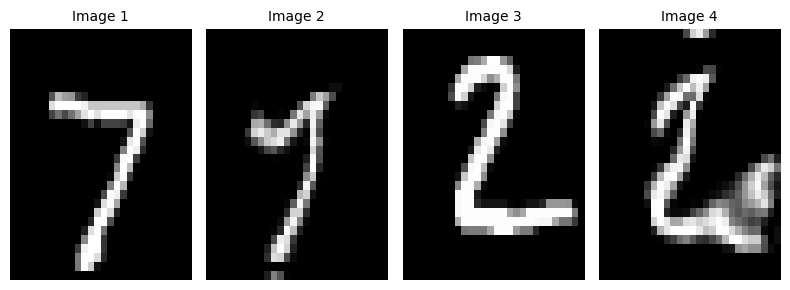

133.0
188.5


In [ ]:
images = X_test[:2]
trans_images = np.array([trans.random_elastic_deformation(image, random_state=np.random.RandomState(42), sigma=3, alpha=30) for image in images])

combined_images = np.array([image for pair in zip(images, trans_images) for image in pair])

# x = 5
vis.plot_grid(combined_images, col_count=4, figsize=(8, 3))
print(met.get_earth_mover_distance(combined_images[0], combined_images[1]))
print(met.get_earth_mover_distance(combined_images[0], combined_images[2]))

# def get_dist_between_images(dist_func, image_pairs) -> List[double]:

# def print

In [ ]:
X_train, X_test, y_train, y_test = basic_models.load_preprocess_mnist_data(scale_features=False, flatten_image=True)

knn = KNeighborsClassifier(n_neighbors=3, metric=met.get_earth_mover_distance)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

KNeighborsClassifier(metric=<function get_move_ether_distance at 0x0000025107C334C0>,
                     n_neighbors=3)

In [ ]:
# get the number of processors
import os
cores_num = os.cpu_count()
knn = KNeighborsClassifier(n_neighbors=3, metric=met.get_earth_mover_distance, n_jobs=-3)

knn.fit(X_train[:10], y_train[:10])
knn.score(X_test, y_test)

0.2317